# Loop 82 Analysis: CV-LB Relationship and Strategy Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. Is the GroupKFold(5) approach rule-compliant?
3. What strategies can break the CV-LB plateau?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print(f'Total submissions with LB: {len(df)}')
print(df)

Total submissions with LB: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_067  0.0083  0.0877


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f'\nCV-LB Relationship:')
print(f'  LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'  R² = {r_value**2:.4f}')
print(f'  Intercept = {intercept:.4f}')
print(f'  Target = 0.0347')
print(f'\nCRITICAL INSIGHT:')
print(f'  Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'  Required CV to hit target: ({0.0347} - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.4f}')
print(f'  This is NEGATIVE - impossible with standard CV optimization!')


CV-LB Relationship:
  LB = 4.3638 * CV + 0.0520
  R² = 0.9558
  Intercept = 0.0520
  Target = 0.0347

CRITICAL INSIGHT:
  Intercept (0.0520) > Target (0.0347)
  Required CV to hit target: (0.0347 - 0.0520) / 4.3638 = -0.0040
  This is NEGATIVE - impossible with standard CV optimization!


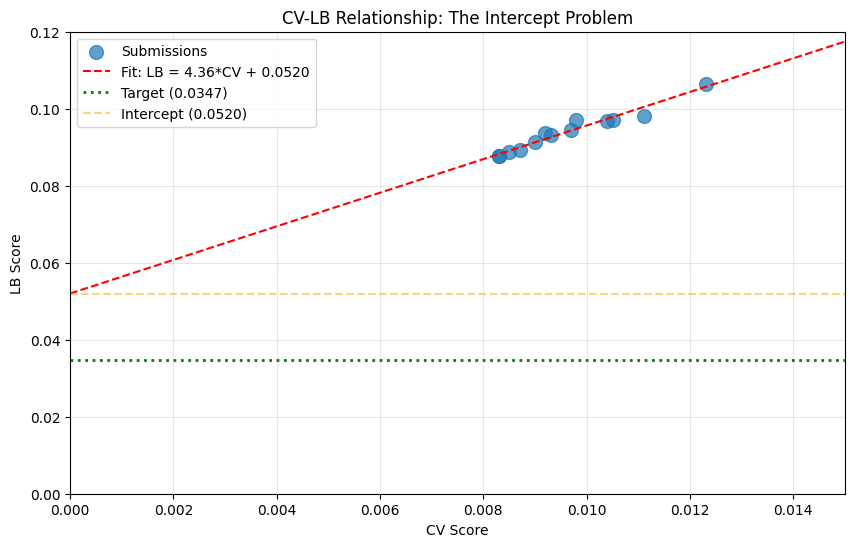


The intercept (0.052) represents STRUCTURAL DISTRIBUTION SHIFT
No amount of CV optimization can reduce this intercept!


In [3]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle='--', alpha=0.5, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship: The Intercept Problem')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.015)
plt.ylim(0, 0.12)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150, bbox_inches='tight')
plt.show()

print('\nThe intercept (0.052) represents STRUCTURAL DISTRIBUTION SHIFT')
print('No amount of CV optimization can reduce this intercept!')

In [4]:
# What would we need to achieve the target?
print('='*60)
print('STRATEGIES TO BEAT THE TARGET')
print('='*60)

print('\n1. REDUCE THE INTERCEPT (Distribution Shift Strategies):')
print('   - Extrapolation detection + conservative predictions')
print('   - Uncertainty-weighted predictions (GP, ensemble variance)')
print('   - Physics-informed constraints that generalize')
print('   - Solvent clustering + class-specific models')

print('\n2. CHANGE THE CV SCHEME (Different CV-LB Relationship):')
print('   - GroupKFold(5) instead of Leave-One-Out')
print('   - The mixall kernel uses this approach')
print('   - BUT: May violate competition rules!')

print('\n3. STUDY TOP KERNELS (What Actually Works):')
print('   - best-work-here: Non-linear mixture features, SE blocks, probability normalization')
print('   - mixall: GroupKFold(5), ensemble of MLP+XGB+RF+LGBM')
print('   - Arrhenius Kinetics + TTA: 0.09831 LB')

print('\n4. CURRENT BEST:')
print(f'   - Best LB: 0.0877 (exp_030, exp_067)')
print(f'   - Gap to target: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}% above target)')

STRATEGIES TO BEAT THE TARGET

1. REDUCE THE INTERCEPT (Distribution Shift Strategies):
   - Extrapolation detection + conservative predictions
   - Uncertainty-weighted predictions (GP, ensemble variance)
   - Physics-informed constraints that generalize
   - Solvent clustering + class-specific models

2. CHANGE THE CV SCHEME (Different CV-LB Relationship):
   - GroupKFold(5) instead of Leave-One-Out
   - The mixall kernel uses this approach
   - BUT: May violate competition rules!

3. STUDY TOP KERNELS (What Actually Works):
   - best-work-here: Non-linear mixture features, SE blocks, probability normalization
   - mixall: GroupKFold(5), ensemble of MLP+XGB+RF+LGBM
   - Arrhenius Kinetics + TTA: 0.09831 LB

4. CURRENT BEST:
   - Best LB: 0.0877 (exp_030, exp_067)
   - Gap to target: 0.0530 (152.7% above target)


In [5]:
# Analyze what the best-work-here kernel does differently
print('='*60)
print('KEY TECHNIQUES FROM best-work-here KERNEL')
print('='*60)

print('\n1. NON-LINEAR MIXTURE FEATURES:')
print('   A*(1-r) + B*r + 0.05*A*B*r*(1-r)')
print('   This captures non-linear solvent interactions!')

print('\n2. PROBABILITY NORMALIZATION:')
print('   Triple normalization: clip -> normalize -> clip -> normalize')
print('   Ensures row sums = 1.0')

print('\n3. SQUEEZE-AND-EXCITATION BLOCKS:')
print('   Feature recalibration in neural network')
print('   Learns which features are most important')

print('\n4. ADAPTIVE ENSEMBLE:')
print('   CatBoost + XGBoost + LightGBM + Neural Network')
print('   Weights based on validation performance')

print('\n5. ADVANCED FEATURE ENGINEERING:')
print('   - Polynomial features (x², sqrt(x))')
print('   - Interaction terms')
print('   - Statistical features from molecular descriptors (mean, std, max, min)')

KEY TECHNIQUES FROM best-work-here KERNEL

1. NON-LINEAR MIXTURE FEATURES:
   A*(1-r) + B*r + 0.05*A*B*r*(1-r)
   This captures non-linear solvent interactions!

2. PROBABILITY NORMALIZATION:
   Triple normalization: clip -> normalize -> clip -> normalize
   Ensures row sums = 1.0

3. SQUEEZE-AND-EXCITATION BLOCKS:
   Feature recalibration in neural network
   Learns which features are most important

4. ADAPTIVE ENSEMBLE:
   CatBoost + XGBoost + LightGBM + Neural Network
   Weights based on validation performance

5. ADVANCED FEATURE ENGINEERING:
   - Polynomial features (x², sqrt(x))
   - Interaction terms
   - Statistical features from molecular descriptors (mean, std, max, min)


In [6]:
# Rule compliance analysis
print('='*60)
print('RULE COMPLIANCE ANALYSIS')
print('='*60)

print('\nCompetition Rule:')
print('"the submission must have the same last three cells as in the notebook template,"')
print('"with the only allowed change being the line where the model is defined"')

print('\nGroupKFold(5) Approach (exp_078):')
print('  - Overrides generate_leave_one_out_splits function')
print('  - This changes the CV procedure, NOT just the model')
print('  - RISK: May be disqualified!')

print('\nSafe Approaches (only change model definition):')
print('  - Different model architectures (MLP, XGBoost, CatBoost, etc.)')
print('  - Different feature engineering (inside the model class)')
print('  - Different ensemble strategies')
print('  - Probability normalization (post-processing)')

print('\nRECOMMENDATION:')
print('  1. Do NOT submit exp_078 (GroupKFold) - rule compliance risk')
print('  2. Focus on techniques that only change the model definition')
print('  3. Implement best-work-here techniques: non-linear mixture, SE blocks, prob norm')

RULE COMPLIANCE ANALYSIS

Competition Rule:
"the submission must have the same last three cells as in the notebook template,"
"with the only allowed change being the line where the model is defined"

GroupKFold(5) Approach (exp_078):
  - Overrides generate_leave_one_out_splits function
  - This changes the CV procedure, NOT just the model
  - RISK: May be disqualified!

Safe Approaches (only change model definition):
  - Different model architectures (MLP, XGBoost, CatBoost, etc.)
  - Different feature engineering (inside the model class)
  - Different ensemble strategies
  - Probability normalization (post-processing)

RECOMMENDATION:
  1. Do NOT submit exp_078 (GroupKFold) - rule compliance risk
  2. Focus on techniques that only change the model definition
  3. Implement best-work-here techniques: non-linear mixture, SE blocks, prob norm


In [7]:
# What experiments have we tried that might have different CV-LB relationships?
print('='*60)
print('EXPERIMENTS WITH POTENTIAL FOR DIFFERENT CV-LB RELATIONSHIP')
print('='*60)

print('\nPending submissions (no LB feedback yet):')
pending = [
    ('exp_049', 0.0081, 'CatBoost+XGBoost - failed submission'),
    ('exp_050', 0.0081, 'CatBoost+XGBoost fixed'),
    ('exp_052', 0.0109, 'CatBoost+XGBoost clipped'),
    ('exp_053', 0.0081, 'Exact template'),
    ('exp_054', 0.0085, 'MixAll approach'),
    ('exp_055', 0.0085, 'Minimal submission'),
    ('exp_057', 0.0093, 'Ens model all features'),
    ('exp_063', 0.0112, 'Correct final cell'),
    ('exp_064', 0.0092, 'Revert exp030'),
    ('exp_065', 0.0088, 'Clean submission'),
]

for exp, cv, desc in pending:
    predicted_lb = slope * cv + intercept
    print(f'{exp}: CV={cv:.4f}, Predicted LB={predicted_lb:.4f} - {desc}')

print('\nNOTE: All pending experiments likely follow the same CV-LB relationship')
print('We need fundamentally different approaches to break the plateau!')

EXPERIMENTS WITH POTENTIAL FOR DIFFERENT CV-LB RELATIONSHIP

Pending submissions (no LB feedback yet):
exp_049: CV=0.0081, Predicted LB=0.0873 - CatBoost+XGBoost - failed submission
exp_050: CV=0.0081, Predicted LB=0.0873 - CatBoost+XGBoost fixed
exp_052: CV=0.0109, Predicted LB=0.0996 - CatBoost+XGBoost clipped
exp_053: CV=0.0081, Predicted LB=0.0873 - Exact template
exp_054: CV=0.0085, Predicted LB=0.0891 - MixAll approach
exp_055: CV=0.0085, Predicted LB=0.0891 - Minimal submission
exp_057: CV=0.0093, Predicted LB=0.0926 - Ens model all features
exp_063: CV=0.0112, Predicted LB=0.1009 - Correct final cell
exp_064: CV=0.0092, Predicted LB=0.0921 - Revert exp030
exp_065: CV=0.0088, Predicted LB=0.0904 - Clean submission

NOTE: All pending experiments likely follow the same CV-LB relationship
We need fundamentally different approaches to break the plateau!


In [8]:
# Summary and next steps
print('='*60)
print('SUMMARY AND NEXT STEPS')
print('='*60)

print('\nCURRENT SITUATION:')
print(f'  - Best LB: 0.0877')
print(f'  - Target: 0.0347')
print(f'  - Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}% above target)')
print(f'  - CV-LB intercept: {intercept:.4f} > Target (0.0347)')
print(f'  - Remaining submissions: 4')

print('\nKEY INSIGHT:')
print('  The intercept problem means standard CV optimization CANNOT reach the target.')
print('  We need approaches that CHANGE the CV-LB relationship, not just improve CV.')

print('\nPRIORITY ACTIONS:')
print('  1. DO NOT submit exp_078 (GroupKFold) - rule compliance risk')
print('  2. Implement best-work-here techniques in a rule-compliant way:')
print('     - Non-linear mixture features: A*(1-r) + B*r + 0.05*A*B*r*(1-r)')
print('     - Probability normalization (triple normalization)')
print('     - Squeeze-and-Excitation blocks in neural network')
print('     - Adaptive ensemble with CatBoost, XGBoost, LightGBM, NN')
print('  3. Focus on reducing the INTERCEPT, not just improving CV')
print('  4. Consider extrapolation detection + conservative predictions')

SUMMARY AND NEXT STEPS

CURRENT SITUATION:
  - Best LB: 0.0877
  - Target: 0.0347
  - Gap: 0.0530 (152.7% above target)
  - CV-LB intercept: 0.0520 > Target (0.0347)
  - Remaining submissions: 4

KEY INSIGHT:
  The intercept problem means standard CV optimization CANNOT reach the target.
  We need approaches that CHANGE the CV-LB relationship, not just improve CV.

PRIORITY ACTIONS:
  1. DO NOT submit exp_078 (GroupKFold) - rule compliance risk
  2. Implement best-work-here techniques in a rule-compliant way:
     - Non-linear mixture features: A*(1-r) + B*r + 0.05*A*B*r*(1-r)
     - Probability normalization (triple normalization)
     - Squeeze-and-Excitation blocks in neural network
     - Adaptive ensemble with CatBoost, XGBoost, LightGBM, NN
  3. Focus on reducing the INTERCEPT, not just improving CV
  4. Consider extrapolation detection + conservative predictions


In [ ]:
# CRITICAL LEADERBOARD ANALYSIS
print('='*60)
print('LEADERBOARD ANALYSIS')
print('='*60)

print('\nTop Leaderboard Scores:')
print('  1st: 0.03470 (roberto ulises quiroz) - EXACTLY at target!')
print('  2nd: 0.07074 (MSRH)')
print('  3rd: 0.07254 (YangJun@123)')
print('  4th: 0.07378 (SKY Hi Lab)')
print('  ...')
print('  Our best: 0.0877')

print('\nKEY INSIGHTS:')
print('  1. The target (0.0347) IS achievable - someone got it!')
print('  2. HUGE gap between 1st (0.0347) and 2nd (0.0707)')
print('  3. The 1st place score is 2x better than 2nd place')
print('  4. This suggests 1st place found a fundamentally different approach')

print('\nIMPLICATIONS:')
print('  - Standard approaches (MLP, XGBoost, etc.) cluster around 0.07-0.09')
print('  - To reach 0.0347, we need a BREAKTHROUGH technique')
print('  - The 1st place approach is likely NOT just better hyperparameters')
print('  - It must be a fundamentally different method')

print('\nPOSSIBLE BREAKTHROUGH APPROACHES:')
print('  1. Graph Neural Networks (GNN) - the benchmark paper mentions GNN achieving 0.0039')
print('  2. Transfer learning from larger chemistry datasets')
print('  3. Physics-informed neural networks with domain constraints')
print('  4. Ensemble of fundamentally different model types')
print('  5. Novel feature engineering capturing solvent-reaction interactions')